In [ ]:
#Load and Inspect the Data
import pandas as pd

In [ ]:
##Load the dataset
df = pd.read_csv("Airbnb_India_Top_500.csv")

In [ ]:
##Preview the data
df.head()


,address,isHostedBySuperhost,location/lat,location/lng,name,numberOfGuests,pricing/rate/amount,roomType,stars
0,"Manali, Himachal Pradesh, India",False,32.22330,77.18228,HighQ Manali / Deluxe Room,3,8946,Room in hotel,NaN
1,"Manali, Himachal Pradesh, India",False,32.22352,77.18152,Highq manali / 3 BHK Cottage,9,9124,Room in hotel,NaN
2,"Goa, India",False,15.50400,73.86600,Best view of the river from your terrace 04,4,9900,Private room in home,4.00
3,"Bhuntar, Himachal Pradesh, India",False,31.88656,77.14467,Shabashe,1,8684,Shared room in rental unit,NaN
4,"Jaipur, Rajasthan, India",False,26.85991,75.66909,Luxurious Independent Studio with Wifi & Kitchen,1,20690,Entire condo,4.75


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   address              500 non-null    object 
 1   isHostedBySuperhost  500 non-null    bool   
 2   location/lat         500 non-null    float64
 3   location/lng         500 non-null    float64
 4   name                 500 non-null    object 
 5   numberOfGuests       500 non-null    int64  
 6   pricing/rate/amount  500 non-null    int64  
 7   roomType             500 non-null    object 
 8   stars                196 non-null    float64
dtypes: bool(1), float64(3), int64(2), object(3)
memory usage: 31.9+ KB


In [5]:
df.describe()

,location/lat,location/lng,numberOfGuests,pricing/rate/amount,stars
count,500.000000,500.000000,500.000000,500.000000,196.000000
mean,19.671298,74.948030,11.560000,938.062000,4.650204
std,6.499412,7.098764,4.543532,2117.821537,0.392452
min,9.418870,-73.750710,1.000000,129.000000,2.330000
25%,15.526502,73.747743,8.000000,433.000000,4.547500
50%,17.920890,73.804140,12.000000,508.500000,4.750000
75%,26.791295,77.019307,16.000000,724.250000,4.900000
max,34.090910,92.991610,16.000000,36079.000000,5.000000


In [ ]:
#Step 3: Data Cleaning Tasks

##1 Clean column names
df.columns = df.columns.str.strip()
df.columns

Index(['address', 'isHostedBySuperhost', 'location/lat', 'location/lng',
       'name', 'numberOfGuests', 'pricing/rate/amount', 'roomType', 'stars'],
      dtype='object')

In [8]:
df.columns = df.columns.str.lower()
df.columns

Index(['address', 'ishostedbysuperhost', 'location/lat', 'location/lng',
       'name', 'numberofguests', 'pricing/rate/amount', 'roomtype', 'stars'],
      dtype='object')

In [10]:
df.columns = df.columns.str.replace(' ', '_')
df.columns

Index(['address', 'ishostedbysuperhost', 'location/lat', 'location/lng',
       'name', 'numberofguests', 'pricing/rate/amount', 'roomtype', 'stars'],
      dtype='object')

In [ ]:
##2 Handle Missing Values
##check for missing values
df.isnull().sum()

address                  0
ishostedbysuperhost      0
location/lat             0
location/lng             0
name                     0
numberofguests           0
pricing/rate/amount      0
roomtype                 0
stars                  304
dtype: int64

In [12]:
df.rename(columns={'pricing/rate/amount': 'year'}, inplace=True)

In [13]:
df.columns

Index(['address', 'ishostedbysuperhost', 'location/lat', 'location/lng',
       'name', 'numberofguests', 'year', 'roomtype', 'stars'],
      dtype='object')

In [14]:
df.rename(columns={'year': 'price'}, inplace=True)
df.columns

Index(['address', 'ishostedbysuperhost', 'location/lat', 'location/lng',
       'name', 'numberofguests', 'price', 'roomtype', 'stars'],
      dtype='object')

In [15]:
df.rename(columns={
    'location/lat': 'location_lat',
    'location/lng': 'location_lng'
}, inplace=True)

In [16]:
df.columns

Index(['address', 'ishostedbysuperhost', 'location_lat', 'location_lng',
       'name', 'numberofguests', 'price', 'roomtype', 'stars'],
      dtype='object')

In [17]:
df.isnull().sum()

address                  0
ishostedbysuperhost      0
location_lat             0
location_lng             0
name                     0
numberofguests           0
price                    0
roomtype                 0
stars                  304
dtype: int64

In [18]:
df['stars']

0       NaN
1       NaN
2      4.00
3       NaN
4      4.75
       ... 
495    4.80
496    3.80
497    5.00
498    5.00
499    4.53
Name: stars, Length: 500, dtype: float64

In [ ]:
##stars column has missing values so
df['stars'] = df['stars'].fillna(df['stars'].mean())

In [20]:
df.isnull().sum()

address                0
ishostedbysuperhost    0
location_lat           0
location_lng           0
name                   0
numberofguests         0
price                  0
roomtype               0
stars                  0
dtype: int64

In [21]:
df['ishostedbysuperhost']

0      False
1      False
2      False
3      False
4      False
       ...  
495     True
496    False
497     True
498     True
499    False
Name: ishostedbysuperhost, Length: 500, dtype: bool

In [ ]:
##fill missing host status as False
df['ishostedbysuperhost'] = df['ishostedbysuperhost'].fillna(False)

In [ ]:
##drop rows with missing critical fields like address or price
df.dropna(subset=['address', 'price'], inplace=True)

In [ ]:
##3 Convert Data Types
df['price'] = df['price'].replace('[₹,]', '', regex=True).astype(float)
df['stars'] = df['stars'].astype(float)
df['numberofguests'] = pd.to_numeric(df['numberofguests'], errors='coerce')

In [ ]:
##4 Standardise Text Columns
df['roomtype'] = df['roomtype'].str.title().str.strip()

In [ ]:
##5 Check for duplicates
df.drop_duplicates(inplace=True)

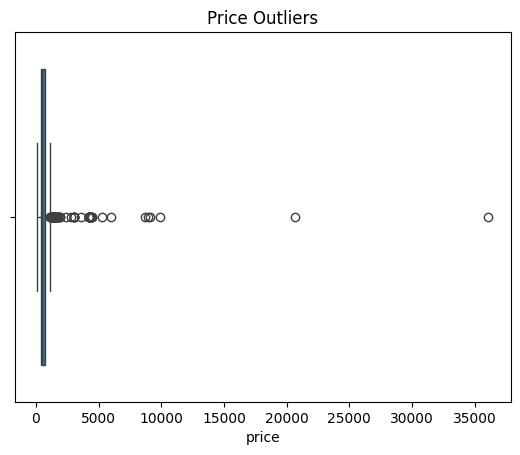

In [ ]:
##6 Outlier Detection
import seaborn as sns
import matplotlib.pyplot as plt

#Price distribution
sns.boxplot(x=df['price'])
plt.title("Price Outliers")
plt.show()

In [ ]:
##Remove extremely high price outliers if needed
df = df[df['price'] < 50000]

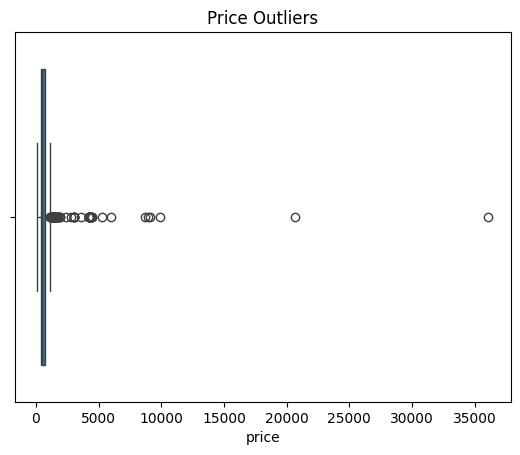

In [32]:
sns.boxplot(x=df['price'])
plt.title("Price Outliers")
plt.show()

In [33]:
#EDA Visualisations for Airbnb India Dataset

##First importing libraries
import matplotlib.pyplot as plt
import seaborn as sns

In [34]:
##set style
sns.set(style='whitegrid')

/var/folders/8c/kqtgvd916gjb42j5y757hxm80000gn/T/ipykernel_6899/4251493808.py:9: UserWarning: Glyph 8377 (\N{INDIAN RUPEE SIGN}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/8c/kqtgvd916gjb42j5y757hxm80000gn/T/ipykernel_6899/4251493808.py:10: UserWarning: Glyph 8377 (\N{INDIAN RUPEE SIGN}) missing from font(s) Arial.
  plt.savefig('images/avg_price_by_roomtype.png', dpi=300)
/Users/macmini/Library/Python/3.12/lib/python/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 8377 (\N{INDIAN RUPEE SIGN}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


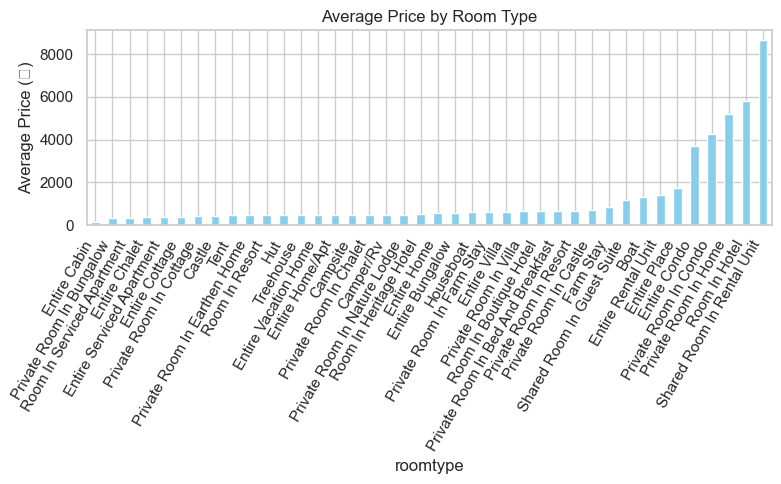

In [38]:
##1. Average Price by room type
room_price = df.groupby('roomtype')['price'].mean().sort_values()

plt.figure(figsize=(8, 5))
room_price.plot(kind='bar', color='skyblue')
plt.title('Average Price by Room Type')
plt.ylabel('Average Price (₹)')
plt.xticks(rotation=60, ha='right')
plt.tight_layout()
plt.savefig('images/avg_price_by_roomtype.png', dpi=300)
plt.show()

/var/folders/8c/kqtgvd916gjb42j5y757hxm80000gn/T/ipykernel_6899/2553005070.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=superhost_stars.index, y=superhost_stars.values, palette='pastel')


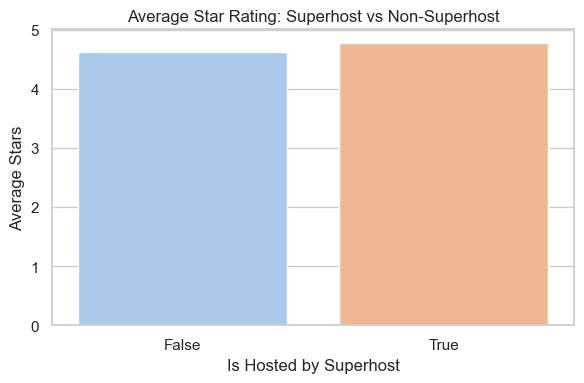

In [39]:
##2. Superhost vs Non-Superhost - Average Ratings

superhost_stars = df.groupby('ishostedbysuperhost')['stars'].mean()

plt.figure(figsize=(6,4))
sns.barplot(x=superhost_stars.index, y=superhost_stars.values, palette='pastel')
plt.title('Average Star Rating: Superhost vs Non-Superhost')
plt.xlabel('Is Hosted by Superhost')
plt.ylabel('Average Stars')
plt.tight_layout()
plt.show()

In [40]:
plt.savefig('images/superhost_vs_stars.png', dpi=300)

<Figure size 640x480 with 0 Axes>

/var/folders/8c/kqtgvd916gjb42j5y757hxm80000gn/T/ipykernel_6899/3394515580.py:8: UserWarning: Glyph 8377 (\N{INDIAN RUPEE SIGN}) missing from font(s) Arial.
  plt.tight_layout()
/Users/macmini/Library/Python/3.12/lib/python/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 8377 (\N{INDIAN RUPEE SIGN}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


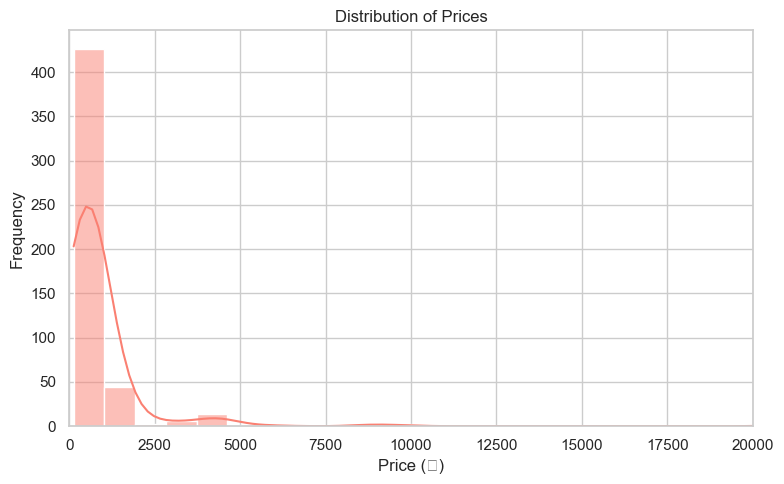

In [41]:
##3. Distribution of Prices
plt.figure(figsize=(8, 5))
sns.histplot(df['price'], bins=40, kde=True, color='salmon')
plt.title('Distribution of Prices')
plt.xlabel('Price (₹)')
plt.ylabel('Frequency')
plt.xlim(0, 20000) #Optional: Focus on more realistic price range
plt.tight_layout()
plt.show()

In [42]:
plt.savefig('images/price_distribution.png', dpi=300)

<Figure size 640x480 with 0 Axes>

/var/folders/8c/kqtgvd916gjb42j5y757hxm80000gn/T/ipykernel_6899/3490402558.py:7: UserWarning: Glyph 8377 (\N{INDIAN RUPEE SIGN}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/8c/kqtgvd916gjb42j5y757hxm80000gn/T/ipykernel_6899/3490402558.py:7: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()
/Users/macmini/Library/Python/3.12/lib/python/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 8377 (\N{INDIAN RUPEE SIGN}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


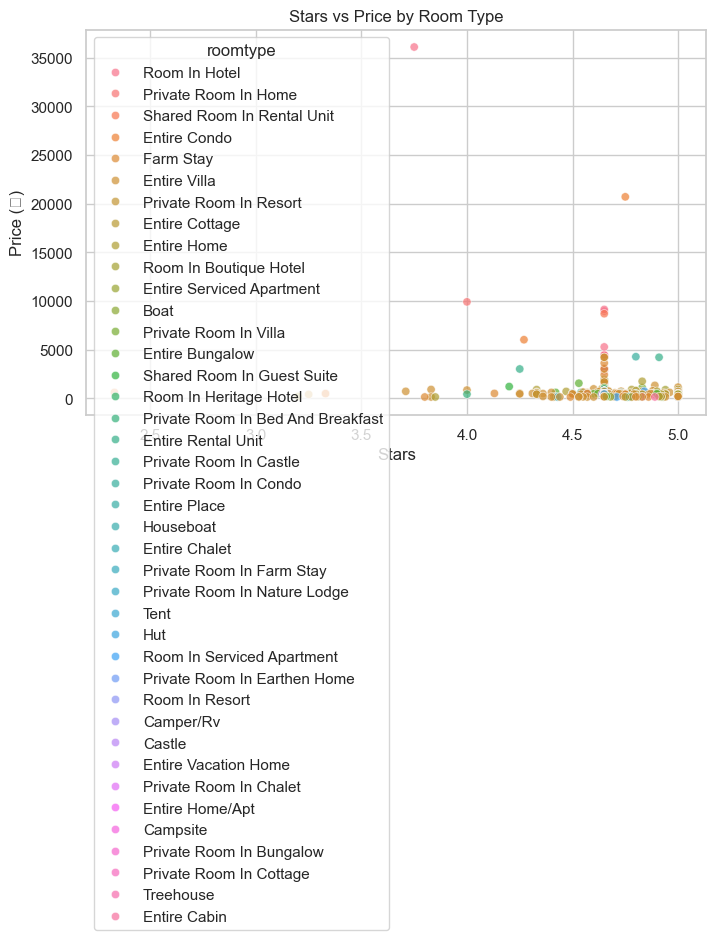

In [43]:
##4. Stars vs Price - Scatter Plot
plt.figure(figsize=(8, 5))
sns.scatterplot(x='stars', y='price', data=df, hue='roomtype', alpha=0.7)
plt.title('Stars vs Price by Room Type')
plt.xlabel('Stars')
plt.ylabel('Price (₹)')
plt.tight_layout()
plt.show()

In [44]:
plt.savefig('images/stars_vs_price.png', dpi=300)

<Figure size 640x480 with 0 Axes>

/var/folders/8c/kqtgvd916gjb42j5y757hxm80000gn/T/ipykernel_6899/3778336966.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='numberofguests', data=df, palette='cool')


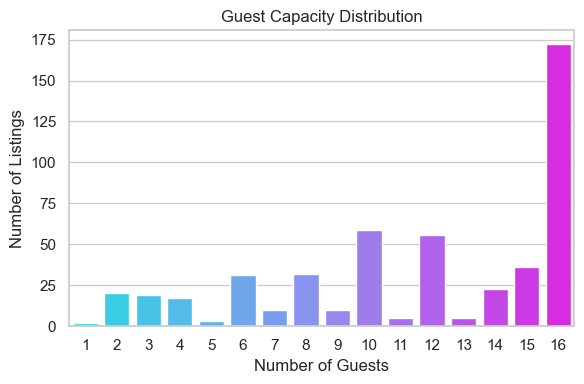

In [45]:
##5. Number of Guests Distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='numberofguests', data=df, palette='cool')
plt.title('Guest Capacity Distribution')
plt.xlabel('Number of Guests')
plt.ylabel('Number of Listings')
plt.tight_layout()
plt.show()

In [46]:
plt.savefig('images/guest_capacity_distribution.png', dpi=300)

<Figure size 640x480 with 0 Axes>